# Whiteboard Test

Trying to understand the difference between defining the system based on EKE and MKE

In [1]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
from importlib import reload
from cmocean import cm as cmo
import xrft
import pandas as pd


import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf

In [7]:
reload(df)
reload(ef)
reload(ff)
reload(pf);

In [3]:
float_z = xr.open_dataset('202206_floats/float_ID:(1901700)_ds_z.nc')
float_r = xr.open_dataset('202206_floats/float_ID:(1901700)_ds_rho.nc')

In [8]:
l1 = 100
l2 = 200
l3 = 400

MKE1 = ef.get_MV(float_z,l1,variable='SPICE')
MKE2 = ef.get_MV(float_z,l2,variable='SPICE')
MKE3 = ef.get_MV(float_z,l3,variable='SPICE')

EKE1 = ef.get_EV(float_z,l1,variable='SPICE')
EKE2 = ef.get_EV(float_z,l2,variable='SPICE')
EKE3 = ef.get_EV(float_z,l3,variable='SPICE')

In [30]:
MKE0_v = EKE1
MKE1_v = MKE1 - MKE2
MKE2_v = MKE2 - MKE3
MKE3_v = MKE3

EKE0_v = EKE1
EKE1_v = EKE2 - EKE1
EKE2_v = EKE3 - EKE2
EKE3_v = MKE3

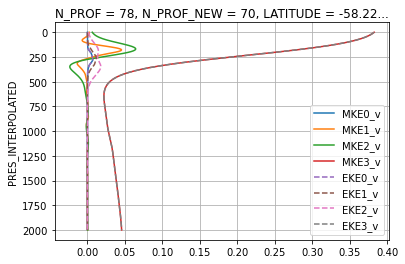

In [81]:
n = 70

MKE0_v.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',label='MKE0_v')
MKE1_v.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',label='MKE1_v')
MKE2_v.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',label='MKE2_v')
MKE3_v.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',label='MKE3_v')

EKE0_v.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',linestyle='--',label='EKE0_v')
EKE1_v.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',linestyle='--',label='EKE1_v')
EKE2_v.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',linestyle='--',label='EKE2_v')
EKE3_v.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',linestyle='--',label='EKE3_v')

plt.gca().invert_yaxis()
plt.legend()
plt.grid()

plt.savefig('EKE,MKE')

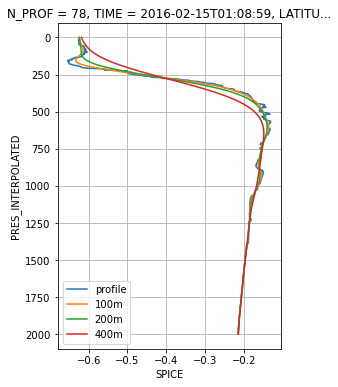

In [80]:
plt.figure(figsize=(4,6))

float_z.isel(N_PROF=n).SPICE.plot(y='PRES_INTERPOLATED',label='profile')
plt.plot(ff.get_filt_prof(float_z.isel(N_PROF=n).SPICE,l1),float_z.PRES_INTERPOLATED,label='{}m'.format(l1))
plt.plot(ff.get_filt_prof(float_z.isel(N_PROF=n).SPICE,l2),float_z.PRES_INTERPOLATED,label='{}m'.format(l2))
plt.plot(ff.get_filt_prof(float_z.isel(N_PROF=n).SPICE,l3),float_z.PRES_INTERPOLATED,label='{}m'.format(l3))

plt.gca().invert_yaxis()
plt.legend()
plt.grid()

plt.savefig('profiles')